In [31]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk.corpus
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets, linear_model
import scipy.sparse as sps
from scipy.sparse import coo_matrix, hstack, vstack, csr_matrix
from scipy import io
from datetime import datetime
import gc
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
train = pd.read_csv('../../input/train.csv',usecols=['Semana', 'Agencia_ID', 
                                                     'Canal_ID', 'Cliente_ID', 'Producto_ID', 'Demanda_uni_equil'])

types = {'Semana':np.uint8, 'Agencia_ID':np.uint16, 'Canal_ID':np.uint8,
         'Ruta_SAK':np.uint16, 'Cliente_ID':np.uint32, 'Producto_ID':np.uint16,
         'Demanda_uni_equil':np.uint32}

In [72]:
train = pd.read_csv('../../input/train_100.csv',usecols=['Semana', 'Agencia_ID', 
                                                     'Canal_ID', 'Cliente_ID', 'Producto_ID', 'Demanda_uni_equil'],
                   index_col  = ['Semana','Cliente_ID','Producto_ID'])

In [97]:
train2 = pd.read_csv('../../input/train_100.csv',usecols=['Semana', 'Agencia_ID', 
                                                     'Canal_ID', 'Cliente_ID', 'Producto_ID', 'Demanda_uni_equil'])

In [70]:
train.head(10).to_csv("../../input/train_100.csv",index=False)

SyntaxError: keyword argument repeated (<ipython-input-70-2f52f582906e>, line 1)

In [73]:
train.describe()

,Agencia_ID,Canal_ID,Demanda_uni_equil
count,10.0,10.0,10.000000
mean,1110.0,7.0,4.200000
std,0.0,0.0,1.135292
min,1110.0,7.0,3.000000
25%,1110.0,7.0,3.250000
50%,1110.0,7.0,4.000000
75%,1110.0,7.0,4.750000
max,1110.0,7.0,6.000000


In [74]:
train.head(10)

Agencia_ID  Canal_ID  Demanda_uni_equil
Semana Cliente_ID Producto_ID                                         
3      15766      1212               1110         7                  3
                  1212               1110         7                  4
                  1238               1110         7                  4
                  1238               1110         7                  4
                  1242               1110         7                  3
                  1250               1110         7                  5
                  1309               1110         7                  3
                  3894               1110         7                  6
       15788      4085               1110         7                  4
                  5310               1110         7                  6

 ## If there is index, groupby should be done seperately for columns on values and indexes..

In [106]:
train.reset_index().groupby('Agencia_ID').count()
#train.groupby(level=[2])

,Semana,Cliente_ID,Producto_ID,Canal_ID,Demanda_uni_equil
Agencia_ID,,,,,
1110,10,10,10,10,10


In [63]:
groupedTrain.sum()

Agencia_ID  Canal_ID  Demanda_uni_equil
Semana Cliente_ID Producto_ID                                         
3      15766      1212               2220        14                  7
                  1238               2220        14                  8
                  1242               1110         7                  3
                  1250               1110         7                  5
                  1309               1110         7                  3
                  3894               1110         7                  6
       15788      4085               1110         7                  4
                  5310               1110         7                  6

In [64]:
train = train.set_index(['Semana','Cliente_ID','Producto_ID'])

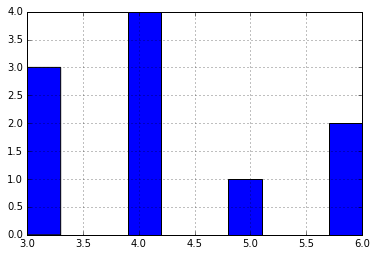

In [65]:
train['Demanda_uni_equil'].hist()

In [66]:
train

Agencia_ID  Canal_ID  Demanda_uni_equil
Semana Cliente_ID Producto_ID                                         
3      15766      1212               1110         7                  3
                  1212               1110         7                  4
                  1238               1110         7                  4
                  1238               1110         7                  4
                  1242               1110         7                  3
                  1250               1110         7                  5
                  1309               1110         7                  3
                  3894               1110         7                  6
       15788      4085               1110         7                  4
                  5310               1110         7                  6

In [68]:
train.loc[(3,15788)]

,Agencia_ID,Canal_ID,Demanda_uni_equil
Producto_ID,,,
4085,1110,7,4
5310,1110,7,6
